In [1]:
import cartopy.crs as ccrs

# Transforming points in one crs to another, e.g. OSGB (Ordinance Survey Great Britain to Geodetic

In [2]:
osgb = ccrs.OSGB()
geod = ccrs.Geodetic()

# Convert from Ordnance Survey GB to lon/lat:
easting = 291813.424
northing = 92098.387

lon, lat = geod.transform_point(
    x=easting, y=northing, src_crs=osgb)
print(lon, lat)

-3.533885175986329 50.71841091955379


In [6]:
# check with mapx, this is UL corner of EASE-Grid 2.0 N!
e2n = ccrs.LambertAzimuthalEqualArea(central_latitude=90.0)
lon, lat = geod.transform_point(
    x = -9000000.,
    y = 9000000.,
    src_crs=e2n)
print(lon, lat)

-135.0 -84.6340496694687


# You can project lines with multiple vertices also:

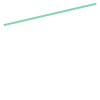

In [10]:
import shapely.geometry as sgeom

new_york = [-74.0060, 40.7128] # lon, lat
honolulu = [-157.8583, 21.3069] # lon, lat

line = sgeom.LineString([new_york, honolulu])
pc = ccrs.PlateCarree()

lines = pc.project_geometry(line, pc)
lines

In [8]:
help(lines)

Help on MultiLineString in module shapely.geometry.multilinestring object:

class MultiLineString(shapely.geometry.base.BaseMultipartGeometry)
 |  A collection of one or more line strings
 |  
 |  A MultiLineString has non-zero length and zero area.
 |  
 |  Attributes
 |  ----------
 |  geoms : sequence
 |      A sequence of LineStrings
 |  
 |  Method resolution order:
 |      MultiLineString
 |      shapely.geometry.base.BaseMultipartGeometry
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lines=None)
 |      Parameters
 |      ----------
 |      lines : sequence
 |          A sequence of line-like coordinate sequences or objects that
 |          provide the numpy array interface, including instances of
 |          LineString.
 |      
 |      Example
 |      -------
 |      Construct a collection containing one line string.
 |      
 |        >>> lines = MultiLineString( [[[0.0, 0.0], [1.0, 2.0]]] )
 |  
 |  

# Look at this line on a map:

<IPython.core.display.Javascript object>


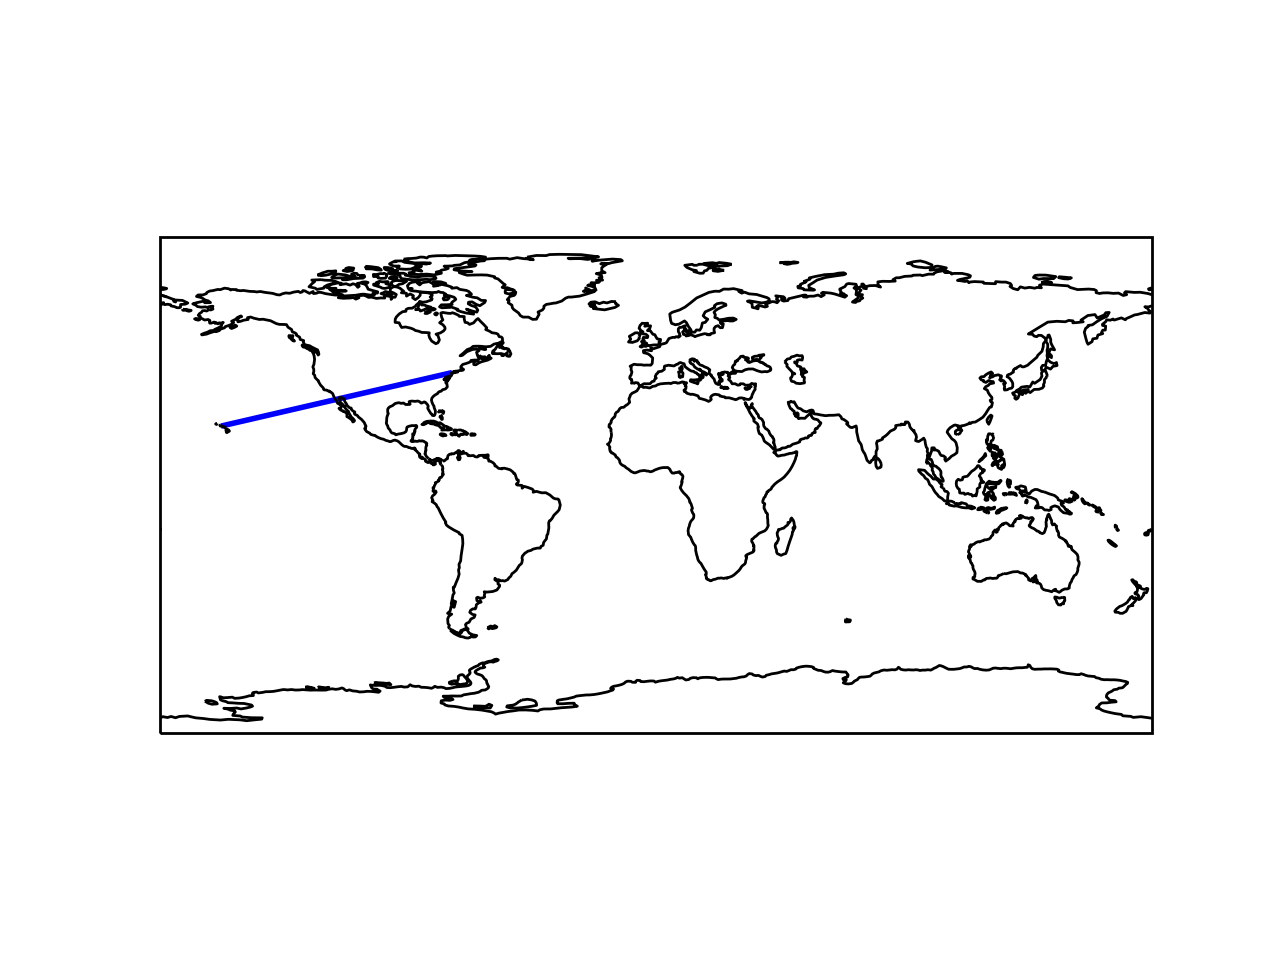

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
ax = plt.axes(projection=pc)
ax.add_geometries(
    [lines], pc,
    edgecolor='blue', facecolor='none', lw=2)
ax.coastlines()
plt.show()

In [15]:
# Will this work on E2N? No:  I think it's because original line coords are in lat/lon?
#e2n_lines = e2n.project_geometry(line, e2n)

#plt.figure()
#ax = plt.axes(projection=e2n)
#ax.add_geometries(
#    [e2n_lines], e2n,
#    edgecolor='blue', facecolor='none', lw=2)
#ax.coastlines()
#plt.show()

# Using cartopy's io shapefile interface to read Hunza basin shapefile

In [17]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

bfile = '/Users/brodzik/Desktop/GIS_data/basins/IN_Hunza_at_DainyorBridge.shp'

In [18]:
reader = shpreader.Reader(bfile)
record = next(reader.records())

In [19]:
record

<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x1190b3ac8>, {'GRDC_NO': 2335100, 'WMO_REG': 2, 'SUB_REG': 35, 'MIX_REG': 235, 'NAT_ID': '1001', 'RIVER': 'HUNZA RIVER', 'STATION': 'DANYOUR BRIDGE', 'COUNTRY_CO': 'PK', 'LAT_ORG': 35.92, 'LONG_ORG': 74.38, 'LAT_NEW': 35.9271, 'LONG_NEW': 74.3729, 'DIST_KM': 1.0, 'AREA': 12950.0, 'AREA_HYS': 13746.4, 'AREA_DIFF': 6.1, 'ALTITUDE': -999.0, 'ELEV_HYS': 1446, 'DS_STAT_NO': 2335200, 'W_LEVEL': 0, 'D_START': 1978, 'D_END': 1982, 'D_YRS': 5, 'D_MISS': 20, 'M_START': 1978, 'M_END': 1982, 'M_YRS': 5, 'M_MISS': 20, 'T_START': 1978, 'T_END': 1982, 'T_YRS': 5, 'LTA_DISCHA': 381.128, 'DISC_HYS': 55.74, 'DISC_DIFF': -85.4, 'R_VOLUME_Y': 12, 'R_HEIGHT_Y': 928, 'PROC_TYRS': 80, 'PROC_TMON': 100, 'F_IMPORT': '16.1.1992', 'F_IM_YR': 1992, 'L_IMPORT': '10.5.1996', 'L_IM_YR': 1996, 'PROVIDER_I': -999, 'ACSYS': 0, 'FLUX2OCEAN': 0, 'GEMS': 0, 'GCOS_GTN_H': 0, 'STATISTICS': 0, 'CODE': 2, 'QUALITY': 'Medium', 'TYPE': 'Automatic', 'COMMENT': 'Area

In [20]:
record.attributes

{'GRDC_NO': 2335100,
 'WMO_REG': 2,
 'SUB_REG': 35,
 'MIX_REG': 235,
 'NAT_ID': '1001',
 'RIVER': 'HUNZA RIVER',
 'STATION': 'DANYOUR BRIDGE',
 'COUNTRY_CO': 'PK',
 'LAT_ORG': 35.92,
 'LONG_ORG': 74.38,
 'LAT_NEW': 35.9271,
 'LONG_NEW': 74.3729,
 'DIST_KM': 1.0,
 'AREA': 12950.0,
 'AREA_HYS': 13746.4,
 'AREA_DIFF': 6.1,
 'ALTITUDE': -999.0,
 'ELEV_HYS': 1446,
 'DS_STAT_NO': 2335200,
 'W_LEVEL': 0,
 'D_START': 1978,
 'D_END': 1982,
 'D_YRS': 5,
 'D_MISS': 20,
 'M_START': 1978,
 'M_END': 1982,
 'M_YRS': 5,
 'M_MISS': 20,
 'T_START': 1978,
 'T_END': 1982,
 'T_YRS': 5,
 'LTA_DISCHA': 381.128,
 'DISC_HYS': 55.74,
 'DISC_DIFF': -85.4,
 'R_VOLUME_Y': 12,
 'R_HEIGHT_Y': 928,
 'PROC_TYRS': 80,
 'PROC_TMON': 100,
 'F_IMPORT': '16.1.1992',
 'F_IM_YR': 1992,
 'L_IMPORT': '10.5.1996',
 'L_IM_YR': 1996,
 'PROVIDER_I': -999,
 'ACSYS': 0,
 'FLUX2OCEAN': 0,
 'GEMS': 0,
 'GCOS_GTN_H': 0,
 'STATISTICS': 0,
 'CODE': 2,
 'QUALITY': 'Medium',
 'TYPE': 'Automatic',
 'COMMENT': 'Area difference 5-10% and dist

In [21]:
record.bounds

(74.02507731119763, 35.92307128906174, 75.77779744466116, 37.09783732096277)

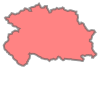

In [22]:
record.geometry

In [23]:
help(record)

Help on Record in module cartopy.io.shapereader object:

class Record(builtins.object)
 |  A single logical entry from a shapefile, combining the attributes with
 |  their associated geometry.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, shape, geometry_factory, attributes, fields)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  bounds
 |      The bounds of this Record's :meth:`~Record.geometry`.
 |  
 |  geometry
 |      A shapely.geometry instance for this Record.
 |      
 |      The geometry may be ``None`` if a null shape is defined in the
 |      shapefile.



In [46]:
e2n = ccrs.LambertAzimuthalEqualArea(central_latitude=90.)
e2n_basin = e2n.project_geometry(record.geometry)

<IPython.core.display.Javascript object>


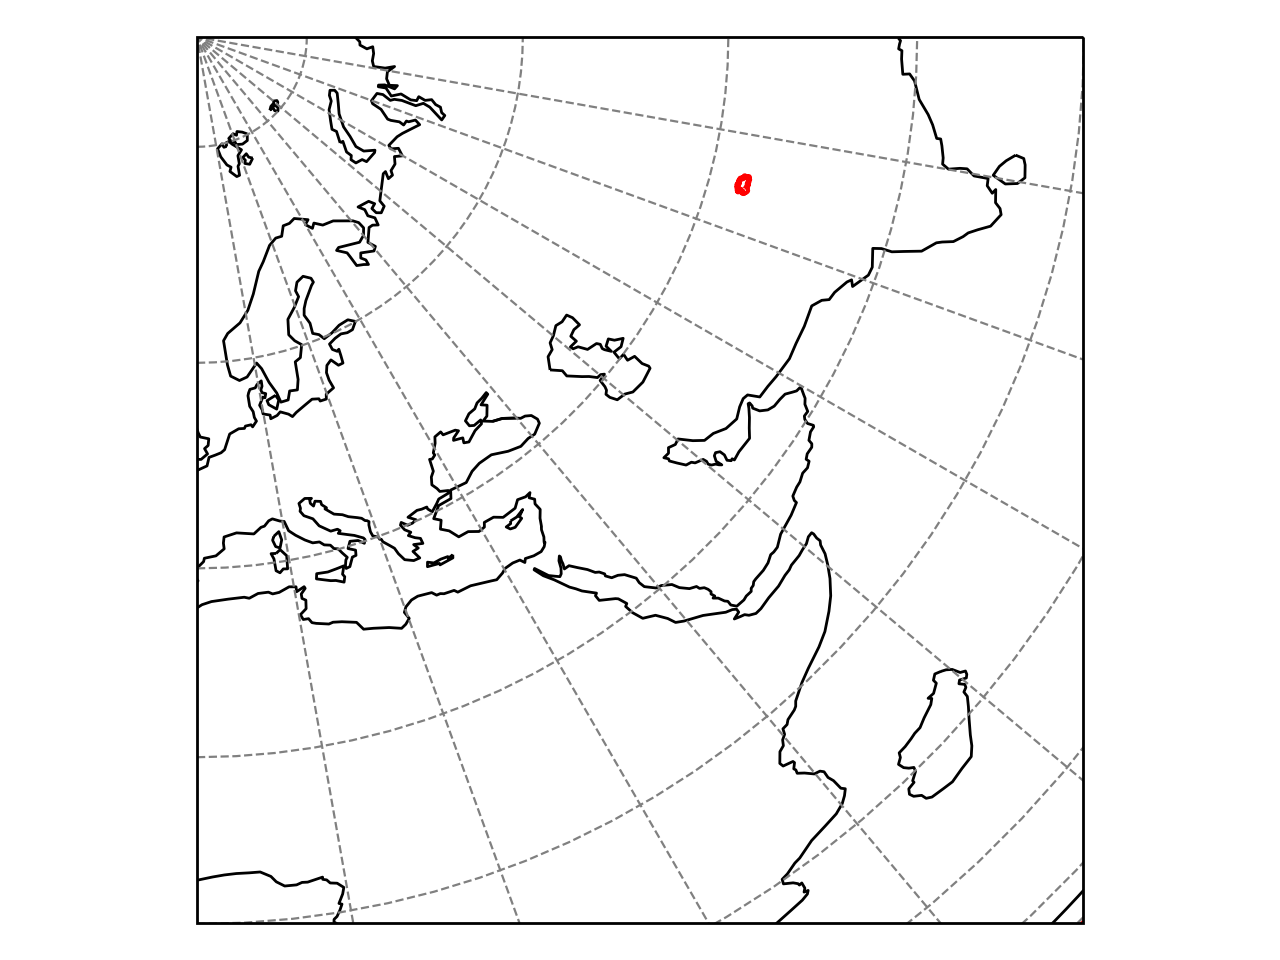

In [45]:
plt.figure()

ax = plt.axes(projection=e2n)
ax.set_extent([0., 9000000., -9000000., 0.], crs=e2n)
ax.gridlines(color='gray', linestyle='--')
ax.coastlines()

ax.add_geometries(
    [e2n_basin], e2n,
    edgecolors='red', facecolor='none', lw=2)


plt.tight_layout()
plt.show()


In [47]:
from netCDF4 import Dataset

In [49]:
cetbfile = '/Users/brodzik/cetb_data/v1.3/AQUA_AMSRE/2004164/NSIDC-0630-EASE2_N3.125km-AQUA_AMSRE-2004164-36H-M-SIR-RSS-v1.3.nc'
f = Dataset(cetbfile, 'r', 'netCDF4')
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD-1.3
    title: MEaSUREs Calibrated Passive Microwave Daily EASE-Grid 2.0 Brightness Temperature ESDR
    product_version: v1.3
    software_version_id: 0.3.15
    software_repository: git@bitbucket.org:nsidc/measures-byu.git
    history: meas_meta_sir
    comment: Epoch date for data in this file: 2004-06-12 00:00:00Z
    source: 10.5067/AMSR-E/AMSREL1A.003
10.5067/AMSR-E/AE_L2A.003
    references: Long, D. G. and M. J. Brodzik. 2016. Optimum Image Formation for Spaceborne Microwave Radiometer Products. IEEE Trans. Geosci. Remote Sensing, 54(5):2763-2779, doi:10.1109/TGRS.2015.2505677.
Algorithm Theoretical Basis Document:  https://nsidc.org/sites/nsidc.org/files/technical-references/MEaSUREs_CETB_ATBD.pdf

    metadata_link: http://nsidc.org/data/nsidc-0630.html
    summary: An improved, enhanced-resolution, gridded passive microwave Earth System Data Record for monitori

In [55]:
import numpy as np
tb = np.squeeze(f.variables['TB'][:])
tb.shape

(5760, 5760)

<IPython.core.display.Javascript object>


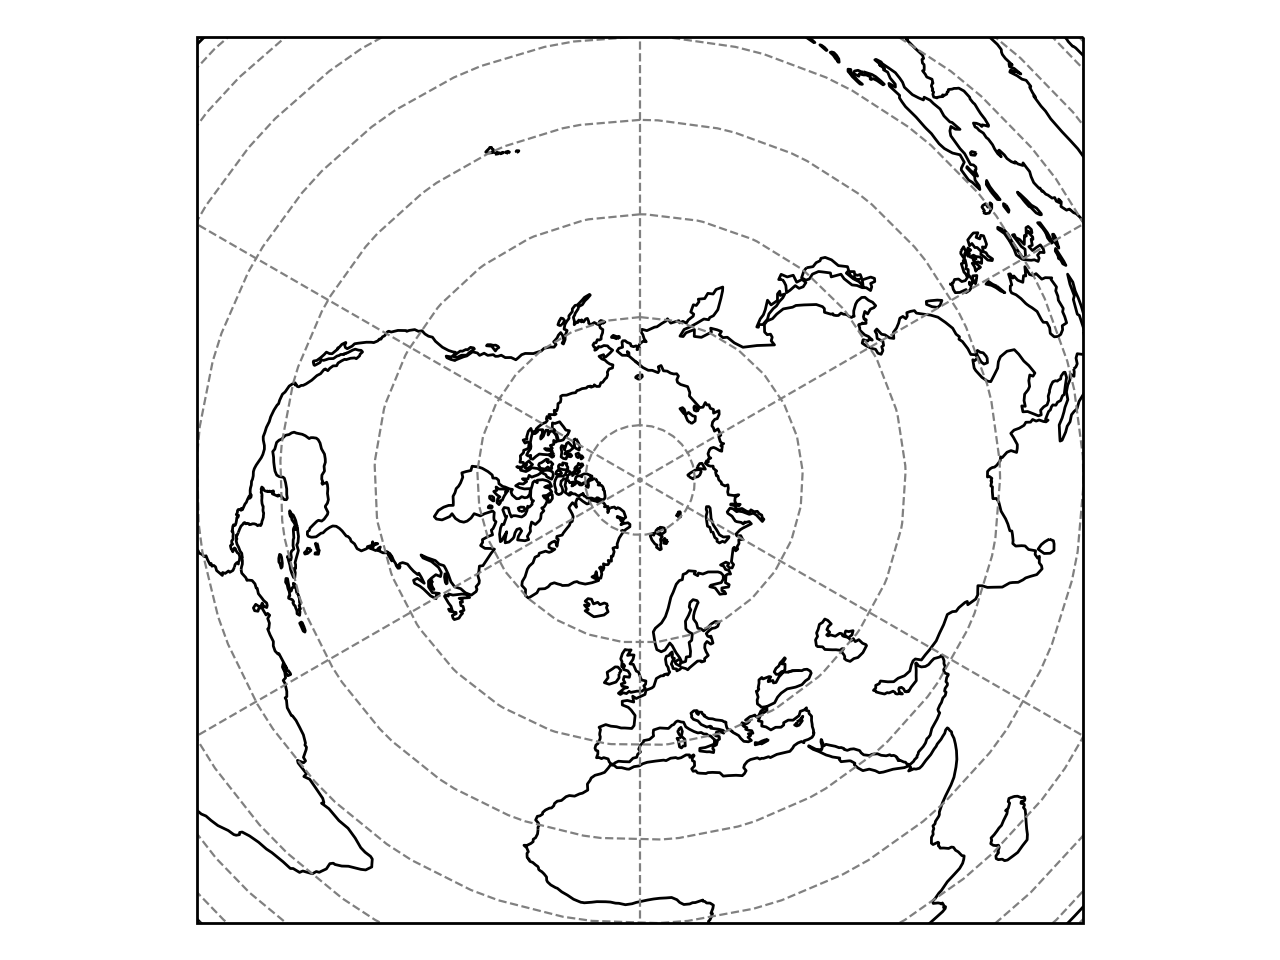

In [58]:
plt.figure()

ax = plt.axes(projection=e2n)
ax.set_extent([-9000000., 9000000., -9000000., 9000000.], crs=e2n)
ax.gridlines(color='gray', linestyle='--')
ax.coastlines()

# ax.imshow(tb, transform=e2n)

#ax.add_geometries(
#    [e2n_basin], e2n,
#    edgecolors='red', facecolor='none', lw=2)


plt.tight_layout()
plt.show()

#ax.imshow(tb, extent=extent, transform=rob, origin='upper')
